# Does inequality exist in Real estate?

The purpose of this research is to investigate there are any inequal problem in real estate.

For the more, this research is inspired by JF which studied about inequality in credit appraisal.

So, we will investigate the inequality in real estate by analyzing the housing prices according to higher degree level.

The research procedure is as follows:

1. Comparing linear model with nonlinear model.

2. Select the target region.

- We select this area because ...

3. The criteria will be "Higher degree" similar to "Race".

4. The variables are same with Ahn et al. (2020).

# Import libraries & data

In [ ]:
!pip install pdpbox
from pdpbox import info_plots
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from pdpbox import info_plots
import xgboost

def setting():
  area = input('The target area is ')
  df = pd.read_excel('/content/drive/MyDrive/Data storage/prices_'+area+'.xlsx')
  df = df[['Spring', 'Fall', 'Winter', 'Longitude', 'Latitude',
       'Size of unit', 'Condominium price', 'Floor', 'Construction year',
       'Network distance to nearest subway station', 'Number of households',
       'Parking space per household', 'Heating type',
       'Number of top university entrants',
       'Network distance to the CBD', 'Network distance to nearest greenspace',
       'Network distance to nearest waterfront', 'Number of bus stops',
       'Population density',
       'Ratio of adults with higher degrees']]

  df.columns =['Spring','Fall','Winter','Longitude','Latitude','Area','Price','Floor','Year','Dist. Subway','Households','Parking',
               'Heating','Top Univ.','Dist. CBD','Dist. Green','Dist. Water','Bus Stops','Pop. Density','Higher Degree']
  df['Price'] = df['Price'].replace(0,1)
  df['Dist. Subway'] = df['Dist. Subway'].replace(0,1)
  df['Dist. Green'] = df['Dist. Green'].replace(0,1)
  df['Dist. Water'] = df['Dist. Water'].replace(0,1)  
  df['Price'] = np.log(df['Price'])
  df['Dist. Subway'] = np.log(df['Dist. Subway'])
  df['Dist. Green'] = np.log(df['Dist. Green'])
  df['Dist. Water'] = np.log(df['Dist. Water'])

  train, test = train_test_split(df, random_state= 2022314397, test_size = 0.3)
  rf = RandomForestRegressor()
  xgb = xgboost.XGBRegressor()
  rf.fit(train.drop(['Price'],axis=1), train['Price'])
  xgb.fit(train.drop(['Price'],axis=1), train['Price'])

  test_rf = pd.DataFrame(rf.predict(test))
  test_rf.columns = ['Price']
  train_rf = pd.DataFrame(rf.predict(train['Price']))
  train_rf.columns =['Price']

  test_xgb = pd.DataFrame(xgb.predict(test['Price']))
  test_xgb.columns = ['Price']
  train_xgb = pd.DataFrame(xgb.predict(train['Price']))
  train_xgb.columns =['Price']  

  train['Predict_rf'] = train_rf['Price']
  test['Predict_rf'] = test_rf['Price']

  train['Predict_xgb'] = train_xgb['Price']
  test['Predict_xgb'] = test_xgb['Price']
  return df, train, test

In [38]:
test_rf = pd.DataFrame(rf.predict(test['Price']))
test_rf.columns = ['Price']
train_rf = pd.DataFrame(rf.predict(train['Price']))
train_rf.columns =['Price']

test_xgb = pd.DataFrame(xgb.predict(test['Price']))
test_xgb.columns = ['Price']
train_xgb = pd.DataFrame(xgb.predict(train['Price']))
train_xgb.columns =['Price']  

train['Predict_rf'] = train_rf['Price']
test['Predict_rf'] = test_rf['Price']

train['Predict_xgb'] = train_xgb['Price']
test['Predict_xgb'] = test_xgb['Price']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [37]:
df, train, test = setting()

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

The target area is busan
[06:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

The target area is daegu


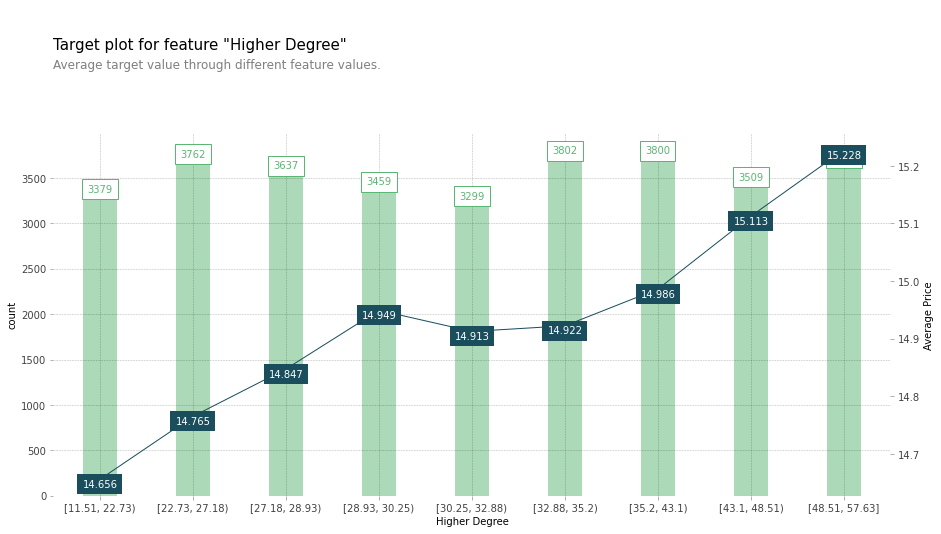

In [30]:
df, train, test = setting()

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

The target area is daejeon


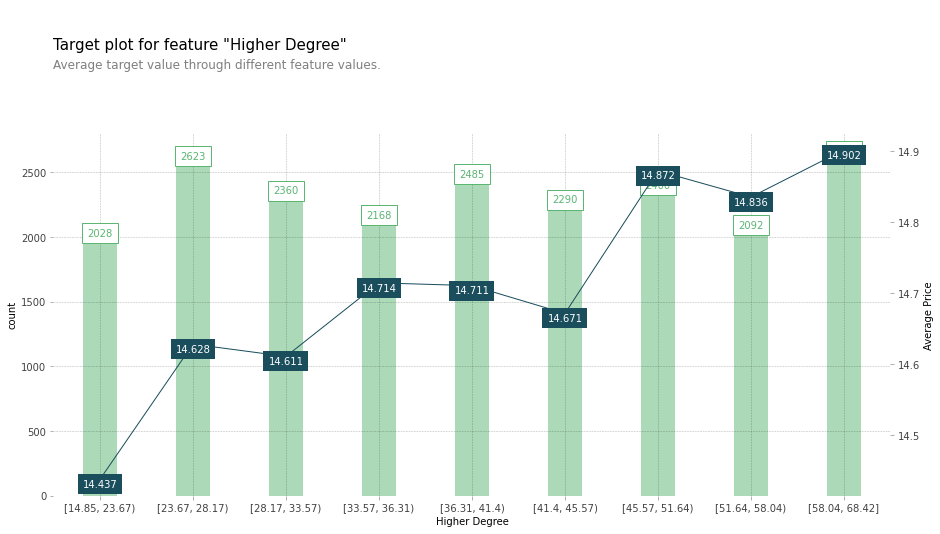

In [31]:
df, train, test = setting()

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

The target area is gwangju


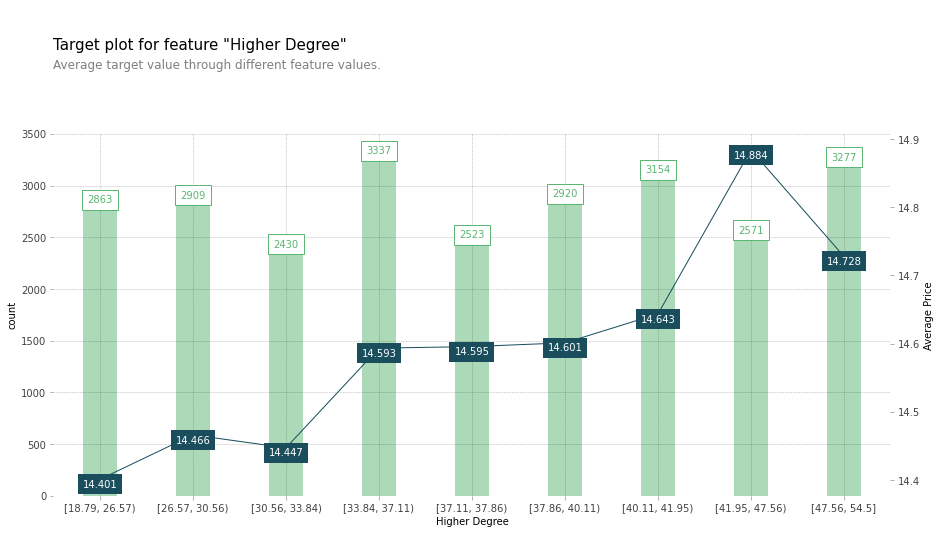

In [32]:
df, train, test = setting()

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)